In [27]:
import numpy as np
import scipy.linalg as la
import itertools as it
import time
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math #ToDo: allowed for exp??
from scipy.spatial import distance


In [4]:
def noisysincfunction(N, noise):
    X = np.sort(2 * np.pi * np.random.rand(1, N) ) - np.pi
    Y = np.sinc(X) + noise * np.random.randn(1, N)
    return X.reshape(-1, 1), Y.flatten()
Xtr, Ytr = noisysincfunction(100, 0.1)
Xte = np.arange( -np.pi, np.pi, 0.01 ).reshape(-1, 1)

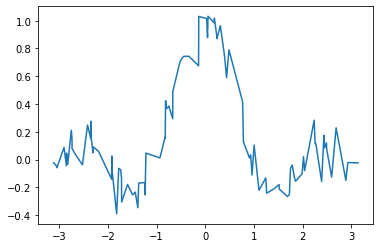

In [5]:
plt.plot(Xtr, Ytr)

In [6]:
def cv(X, y, method, params, loss_function=zero_one_loss, nfolds=10, nrepetitions=5):
    ''' your header here!
    '''
    return method

NameError: name 'zero_one_loss' is not defined

# KRR

In [106]:
class krr():
    ''' your header here!
    '''
    def __init__(self, kernel='linear', kernelparameter=1, regularization=1):
        self.kernel = kernel
        self.kernelparameter = kernelparameter
        self.regularization = regularization

    def getTrainK(self, X, kernel, kernelparam=1.):
        if kernel == 'linear':
            return X@X.T
        if kernel == 'polynomial':
            return (X@X.T+1)**kernelparam
        if kernel == 'gaussianCdist':
            dist = distance.cdist(X, X, 'euclidean')
            return (np.exp(-1*((dist)**2)/(2 * np.square(kernelparam))))
        if kernel == 'gaussian':
            dist = (-2 * X @ X.T + (np.sum(X ** 2, axis=1) + np.sum(X ** 2, axis=1)[:, np.newaxis]).T)**0.5
            return (np.exp(-1*((dist)**2)/(2 * np.square(kernelparam))))            
        pass
    
    def getPredK(self, X, kernel, kernelparam=1.):
        if kernel == 'linear':
            return X@self.trainX.T
        if kernel == 'polynomial':
            return (X@self.trainX.T+1)**kernelparam
        if kernel == 'gaussianCdist':
            dist = distance.cdist(X,self.trainX, 'euclidean')
            return (np.exp(-1*(dist**2)/(2 * np.square(kernelparam))))
        if kernel == 'gaussian':
            dist = (-2 * X @ self.trainX.T + (np.sum(X ** 2, axis=1) + np.sum(self.trainX ** 2, axis=1)[:, np.newaxis]).T)**0.5
            return (np.exp(-1*((dist)**2)/(2 * np.square(kernelparam)))) 
        pass
    
    #efficient leave one out cross validation
    def eloocv(self, K, Y):
        eigval, U = la.eig(K)
        U = U.real
        L = np.diag(eigval).real
        UL = np.dot(U, L)

        C3 = np.logspace(-5,5,100)
        I3 = np.eye(len(L))
        CI3 = np.einsum('ij,k->kij', I3, C3)

        CI3L = CI3 + L
        dt = np.dtype(np.float32)
        apinv = list(map(lambda n: la.pinv(n), CI3L))
        apinv = np.asarray(apinv,dtype=dt) 

        ULCI3 = np.einsum('lj,ijk->ilk',UL,apinv)
        ULCI3UT = np.einsum('ikj,jl->ikl', ULCI3, U.T)
        S = ULCI3UT
        Sdiag = np.einsum('kii->ki', S)
        err = np.mean(np.square((Y-np.dot(S, Y))*((1-Sdiag)**-1)), axis=1)
        
        return C3[np.where(err==min(err))]

    def fit(self, X, y, kernel=False, kernelparameter=False, regularization=False):
        ''' your header here!
        '''
        if kernel is not False:
            self.kernel = kernel
        if kernelparameter is not False:
            self.kernelparameter = kernelparameter
        if regularization is not False:
            self.regularization = regularization
        self.trainX = X
        self.K = self.getTrainK(X, self.kernel, self.kernelparameter)
        if self.regularization==0:
            self.regularization = self.eloocv(self.K, y)
        self.alpha = np.linalg.inv(self.K+self.regularization*np.eye(len(X)))@y
        return self

    def predict(self, X):
        print(self.getPredK(X, self.kernel, self.kernelparameter).shape)
        print(self.alpha.shape)
        self.m = self.getPredK(X, self.kernel, self.kernelparameter)@self.alpha#,axis=1)
        return self.m

(629, 100)
(100,)


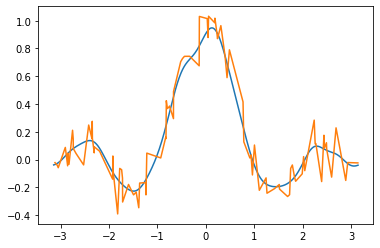

In [107]:
test = krr(kernel = 'gaussianCdist', kernelparameter=.25, regularization=0) #8 for polynomial
t = time.time()
a = test.fit(X=Xtr, y=Ytr)
#print(time.time()-t)
plt.plot(Xte, a.predict(Xte))
plt.plot(Xtr, Ytr)

(629, 100)
(100,)


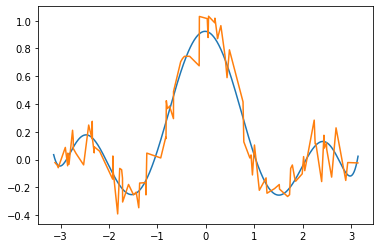

In [109]:
test = krr(kernel = 'polynomial', kernelparameter=8, regularization=.5) #8 for polynomial
a = test.fit(X=Xtr, y=Ytr)
plt.plot(Xte, a.predict(Xte))
plt.plot(Xtr, Ytr)

In [141]:

banana_xtrain = np.loadtxt('data/U04_banana-xtrain.dat')
banana_xtrain = banana_xtrain.T
banana_ytrain = np.loadtxt('data/U04_banana-ytrain.dat')
banana_ytrain = banana_ytrain.T
banana_xtest = np.loadtxt('data/U04_banana-xtest.dat')
banana_xtest = banana_xtest.T
banana_ytest = np.loadtxt('data/U04_banana-ytest.dat')
banana_ytest = banana_ytest.T

In [134]:
banana_ytest.T

array([ 1., -1., -1., ...,  1., -1., -1.])

/home/oliver/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


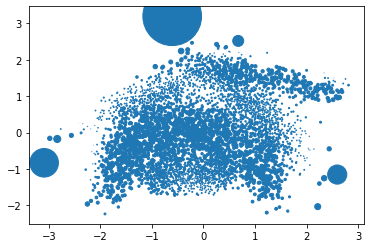

In [143]:
test = krr(kernel = 'gaussian', kernelparameter=.25, regularization=.5) #8 for polynomial
a = test.fit(X=banana_xtrain, y=banana_ytrain)
#plt.plot(a.predict(banana_xtest))
plt.scatter(banana_xtest.T[0], banana_xtest.T[1], (pred+1.9)**2)


#plt.plot(Xtr, Ytr)
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d') 
#pred = a.predict(banana_xtest)
#ax.plot(banana_xtest.T[0, 0:100], banana_xtest.T[1, 0:100], banana_ytest[0:100])#pred)

#ax.plot(banana_xtest.T[0, 0:100], banana_xtest.T[1, 0:100], pred[0:100])

In [148]:
for i in np.logspace(-4,2,30):
    print(i)


0.0001
0.00016102620275609394
0.0002592943797404667
0.00041753189365604
0.0006723357536499335
0.001082636733874054
0.0017433288221999873
0.0028072162039411755
0.004520353656360241
0.007278953843983146
0.011721022975334805
0.018873918221350976
0.03039195382313198
0.04893900918477494
0.07880462815669913
0.12689610031679222
0.20433597178569418
0.32903445623126676
0.5298316906283708
0.8531678524172805
1.3738237958832638
2.21221629107045
3.562247890262444
5.736152510448681
9.236708571873866
14.873521072935118
23.95026619987486
38.56620421163472
62.10169418915616
100.0


In [144]:
def auc(y_true, y_pred, plot=False):
    """
    Area Under Curve, also called "c-statistic" ("concordance statistic")

    @param y_true: true labels, {-1,1}^n
    @param y_pred: predicted value, [-1,1]
    @param plot: boolean, when true plot the ROC curve
    @return: Area Under Curve
    """
    # Convert data to {0, 1} format
    y_true = np.where(y_true == 1.0, 1, 0)

    # sort values in descending order
    indices_desc = np.argsort(y_pred)[::-1]
    y_true = y_true[indices_desc]
    y_pred = y_pred[indices_desc]

    # Calculate True Positives and False Negatives
    tps = np.cumsum(y_true)
    fps = 1 + np.arange(tps.size) - tps

    # Making sure that the first value is (0,0)
    tps = np.r_[0, tps]
    fps = np.r_[0, fps]

    # Calculating False Positive Rate and True Positive Rate
    fpr = fps / fps[-1]
    tpr = tps / tps[-1]

    # AUC is the area under the ROC curve
    # Using trapezoidal integration
    c = np.trapz(tpr, fpr)

    if plot:
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show()

    return c

In [ ]:
roc_fun(y_)

# Efiicient LOOCV

In [132]:
def getTrainK(X, kernel, kernelparam=1.):
        if kernel == 'linear':
            return X.T*X
        if kernel == 'polynomial':
            return np.power(X.T*X+1, kernelparam)
        if kernel == 'gaussian':
            return (np.exp(-1*((X.T-X)**2)/(2 * np.square(kernelparam))))
            pass
        print("dafuq")
        pass
    
def getPredK(X, kernel, kernelparam=1.):
        if kernel == 'linear':
            return Xtr.T*X
        if kernel == 'polynomial':
            return (Xtr.T*X+1)**kernelparam
        if kernel == 'gaussian':
            return (np.exp(-1*((X.T-X)**2)/(2 * np.square(kernelparam))))
            pass
        print("dafuq")
        pass

In [134]:
getTrainK(Xtr, 'polynomial', 3)

array([[1141.823618  ,  997.63088501,  975.27433029, ..., -493.57268593,
        -540.64660338, -579.15462558],
       [ 997.63088501,  872.23344961,  852.78580155, ..., -416.77582328,
        -456.79221114, -489.53795076],
       [ 975.27433029,  852.78580155,  833.78840896, ..., -405.03100935,
        -443.96503863, -475.82694628],
       ...,
       [-493.57268593, -416.77582328, -405.03100935, ...,  826.77216672,
         888.91585112,  939.20800977],
       [-540.64660338, -456.79221114, -443.96503863, ...,  888.91585112,
         955.92532046, 1010.16169935],
       [-579.15462558, -489.53795076, -475.82694628, ...,  939.20800977,
        1010.16169935, 1067.59550177]])

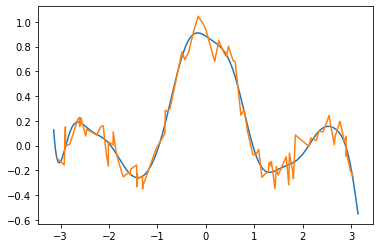

In [54]:
test = krr(kernel = 'gaussian', kernelparameter=1, regularization=C[np.where(err==min(err))]) #8 for polynomial
a = test.fit(X=Xtr, y=Ytr)
plt.plot(Xte, a.predict(Xte))
plt.plot(Xtr, Ytr)

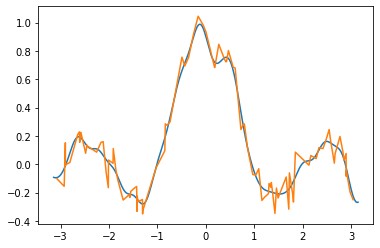

In [159]:
kernel = 'gaussian'
param = .2
K = getTrainK(Xtr, kernel, param)
test = krr(kernel = kernel, kernelparameter=param, regularization=eloocv(K, Ytr)) #8 for polynomial
a = test.fit(X=Xtr, y=Ytr)
plt.plot(Xte, a.predict(Xte))
plt.plot(Xtr, Ytr)

In [24]:
predK = getPredK(Xte, 'polynomial', 3)

In [136]:
getTrainK(Xtr, 'polynomial', 1)

array([[10.45200657,  9.99209671,  9.91689233, ..., -7.9028494 ,
        -8.14650183, -8.3354972 ],
       [ 9.99209671,  9.55456485,  9.48301972, ..., -7.46966009,
        -7.70145703, -7.88125637],
       [ 9.91689233,  9.48301972,  9.41207295, ..., -7.39882505,
        -7.62868338, -7.806979  ],
       ...,
       [-7.9028494 , -7.46966009, -7.39882505, ...,  9.38559801,
         9.61509435,  9.79310917],
       [-8.14650183, -7.70145703, -7.62868338, ...,  9.61509435,
         9.85087153, 10.03375824],
       [-8.3354972 , -7.88125637, -7.806979  , ...,  9.79310917,
        10.03375824, 10.22042397]])

In [137]:
K = getTrainK(Xtr, 'polynomial', 2)
err = np.array([])
eigval, U = la.eig(K)
U = U.real
L = np.diag(eigval).real
C = 0.1#np.logspace(-10, 10, 100) #should be variable, logspace(-10, 10, 100) [or so]
inv = np.array([])
#for c in C:
c=C
inverse = la.pinv(L+c*np.eye(len(L)))
inv = inverse
S = np.dot(np.dot(np.dot(U, L), inverse), U.T)
Sdiag = np.diagonal(S)
err = np.append(err, np.mean(np.square((Ytr-np.dot(S, Ytr))/(1-Sdiag)), axis=0))

In [109]:
err

array([0.11259454])

In [88]:
eloocv(K, Ytr)

array([5.09413801])

In [167]:
#Alternative without for loops for whole logspace:

def eloocv(K, Y):
    eigval, U = la.eig(K)
    U = U.real
    L = np.diag(eigval).real
    UL = np.dot(U, L)

    C3 = np.logspace(-5,5,50)#np.array([5, 6, 7])#1,2,3,4,5,6,7])
    I3 = np.eye(len(L))
    CI3 = np.einsum('ij,k->kij', I3, C3)

    CI3L = CI3 + L
    dt = np.dtype(np.float32)
    apinv = list(map(lambda n: la.pinv(n), CI3L))
    apinv = np.asarray(apinv,dtype=dt) 

    ULCI3 = np.einsum('lj,ijk->ilk',UL,apinv)
    ULCI3UT = np.einsum('ikj,jl->ikl', ULCI3, U.T)
    Se = ULCI3UT
    Sdiage = np.einsum('kii->ki', Se)
    err = np.mean(np.square((Y-np.dot(Se, Y))*((1-Sdiage)**-1)), axis=1)

    return C3[np.where(err==min(err))]

In [111]:
err

array([0.11259454, 0.11258238])

In [56]:
K = getTrainK(Xtr, 'polynomial', 3)
eigval, U = la.eig(K)
U = U.real
L = np.diag(eigval).real
C = [[5]]#, [2]] #should be variable, logspace(-10, 10, 100) [or so]
inverse = la.pinv(L+C*np.eye(len(L)))
S = np.dot(np.dot(np.dot(U, L), inverse), U.T)
Sdiag = np.diagonal(S)
err = np.mean(np.square((Ytr-np.dot(Ytr, S))/(1-Sdiag)), axis=0)
err

0.11398834017317463

In [ ]:
neighbours = np.einsum('ijk,ij->ijk', relPos, epsilonmask)

In [455]:
S.shape

(100, 100)

In [224]:
C3 = np.array([1,2])
I3 = np.eye(len(L))
CI3 = np.einsum('ij,k->ijk', I3, C3)
CI3L = CI3.T+L

In [238]:
dt = np.dtype(np.float32)
apinv = list(map(lambda n: la.pinv(n), CI3L))
apinv = np.asarray(apinv,dtype=dt)

In [255]:
UL = np.dot(U, L)
UL.shape

(100, 100)

## Testing 3D error calculation for C = [-10, ..., 10] instead of C=1

In [82]:
Ltest = L#np.array([[1,2], [3,4]])
Utest = U#np.array([[1, 10], [100, 1000]])
ytest = Ytr#[8,9]

#Ltest = np.array([[1,2], [3,4]])
#Utest = np.array([[1, 10], [100, 1000]])
#ytest = [8,9]

ULtest = np.dot(Utest, Ltest)



In [85]:
C3 = np.logspace(-10,10,100)#np.array([5, 6, 7])#1,2,3,4,5,6,7])
I3test = np.eye(len(Ltest))
CI3test = np.einsum('ij,k->kij', I3test, C3)

CI3L = CI3test + Ltest
dt = np.dtype(np.float32)
apinv = list(map(lambda n: la.pinv(n), CI3L))
apinv = np.asarray(apinv,dtype=dt) 

ULCI3 = np.einsum('lj,ijk->ilk',ULtest,apinv)
ULCI3UT = np.einsum('ikj,jl->ikl', ULCI3, Utest.T)
Stest = ULCI3UT
Stestdiag = np.einsum('kii->ki', Stest)
errtest = np.mean(np.square((ytest-np.dot(Stest, ytest))*((1-Stestdiag)**-1)), axis=1)

C3[np.where(errtest==min(errtest))]

array([3.19926714])

0.1403294991182015

In [79]:
Stest

array([[[4.27708329e+01, 4.27708329e+03],
        [4.27708329e+03, 4.27708329e+05]],

       [[3.91250000e+01, 3.91250000e+03],
        [3.91250000e+03, 3.91250000e+05]],

       [[3.60365844e+01, 3.60365844e+03],
        [3.60365844e+03, 3.60365844e+05]]])

In [78]:
Stestdiag

array([[4.27708329e+01, 4.27708329e+05],
       [3.91250000e+01, 3.91250000e+05],
       [3.60365844e+01, 3.60365844e+05]])

In [64]:
np.dot(ULCI3[0], Utest.T)

array([[4.27708329e+01, 4.27708329e+03],
       [4.27708329e+03, 4.27708329e+05]])

In [43]:
ULtest

array([[  31,   42],
       [3100, 4200]])

In [45]:
apinv[0]

array([[ 0.1875    , -0.04166667],
       [-0.0625    ,  0.125     ]], dtype=float32)

In [47]:
np.einsum('ij,kim->kij', ULtest, apinv)

array([[[  4.52083329,   6.12499995],
        [193.75      , 262.5       ]],

       [[  3.875     ,   5.25      ],
        [193.75      , 262.5       ]]])

array([[[  3.1875    ,   3.95833329],
        [318.75      , 395.83332948]],

       [[  2.875     ,   3.625     ],
        [287.5       , 362.5       ]]])

In [471]:
(ytest-(np.dot(Stest[0],ytest)))/(1-Stestdiag[0])

array([98.0044335,  9.8000002])

In [473]:
(ytest-(np.dot(Stest[0],ytest))),(1-Stestdiag[0])**-1

107.8044336940827

In [486]:
np.square((ytest-(np.dot(Stest[0],ytest)))/(1-Stestdiag[0]))

array([9604.86898517,   96.04000385])

In [359]:
ULCI3UT[0]

array([[  20301.,  203010.],
       [ 407030., 4070300.]])

In [355]:
(np.dot(ULtest, CI3test[0]))

array([[ 201., 2010.],
       [ 403., 4030.]])

In [356]:
np.dot(np.dot(ULtest, CI3test[0]),Utest.T)

array([[  20301., 2030100.],
       [  40703., 4070300.]])

In [220]:
CI3test.T+Ltest

array([[[2., 2.],
        [3., 5.]],

       [[3., 2.],
        [3., 6.]]])

In [218]:
I3test

array([[1., 0.],
       [0., 1.]])

In [175]:
np.logspace(-10, 10, 100)

array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876128e-07, 6.89261210e-07,
       1.09749877e-06, 1.74752840e-06, 2.78255940e-06, 4.43062146e-06,
       7.05480231e-06, 1.12332403e-05, 1.78864953e-05, 2.84803587e-05,
       4.53487851e-05, 7.22080902e-05, 1.14975700e-04, 1.83073828e-04,
       2.91505306e-04, 4.64158883e-04, 7.39072203e-04, 1.17681195e-03,
       1.87381742e-03, 2.98364724e-03, 4.75081016e-03, 7.56463328e-03,
       1.20450354e-02, 1.91791026e-02, 3.05385551e-02, 4.86260158e-02,
       7.74263683e-02, 1.23284674e-01, 1.96304065e-01, 3.12571585e-01,
       4.97702356e-01, 7.92482898e-01, 1.26185688e+00, 2.00923300e+00,
       3.19926714e+00, 5.09413801e+00, 8.11130831e+00, 1.29154967e+01,
      

In [170]:
np.mean(np.square((Ytr-np.dot(Ytr, S))/Sdiag))

126.33379365062824

In [149]:
np.sum(getK(X=np.array([[-1.5]]), kernel='polynomial', kernelparam=3.)*w)

9.468079765807724

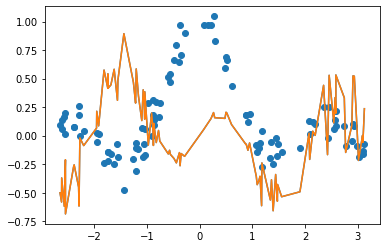

In [144]:
plt.scatter(Xtr, Ytr)
plt.plot(Xtr, (w*Xtr.flatten()))
plt.plot(Xtr, (act_w*Xtr.flatten()))

In [29]:
a.predict(Xte)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 629 is different from 100)

In [59]:
import sklearn
from sklearn.kernel_ridge import KernelRidge
import numpy as np
clf = KernelRidge(kernel='polynomial', alpha=1.0, degree=8)
clf.fit(Xtr, Ytr)
plt.plot(Xte, clf.predict(Xte))

KernelRidge(alpha=1.0, degree=8, kernel='polynomial')

In [65]:
np.array([1])@np.array([3])

3

In [217]:
act_w = clf.dual_coef_

In [225]:
act_pred = clf.predict(Xte)

In [317]:
sklearn.metrics.pairwise.PAIRWISE_KERNEL_FUNCTIONS

{'additive_chi2': <function sklearn.metrics.pairwise.additive_chi2_kernel(X, Y=None)>,
 'chi2': <function sklearn.metrics.pairwise.chi2_kernel(X, Y=None, gamma=1.0)>,
 'linear': <function sklearn.metrics.pairwise.linear_kernel(X, Y=None, dense_output=True)>,
 'polynomial': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'poly': <function sklearn.metrics.pairwise.polynomial_kernel(X, Y=None, degree=3, gamma=None, coef0=1)>,
 'rbf': <function sklearn.metrics.pairwise.rbf_kernel(X, Y=None, gamma=None)>,
 'laplacian': <function sklearn.metrics.pairwise.laplacian_kernel(X, Y=None, gamma=None)>,
 'sigmoid': <function sklearn.metrics.pairwise.sigmoid_kernel(X, Y=None, gamma=None, coef0=1)>,
 'cosine': <function sklearn.metrics.pairwise.cosine_similarity(X, Y=None, dense_output=True)>}

In [202]:
import os